In [1]:
%matplotlib inline

# Convolutional Neural Network hyperparameters for image embeddings

In Bering model, image embeddings are learned from CNN models and used to capture cell boundary information from staining images, such as DAPI and membrane staining. The hyperparameters of CNN, such as number of CNN layers, and the layer sizes, may impact the model performance. In this tutorial, we use Nanostring CosMx data as an example to show the influences of CNN model structures.

### Import packages & data

In [2]:
import random
import numpy as np
import pandas as pd
import tifffile as tiff
import matplotlib.pyplot as plt 

import Bering as br

In [3]:
# load data
df_spots_seg = pd.read_csv('/data/aronow/Kang/spatial/Bering/demo/bm2_cosmx_nsclc/spots_seg.txt', sep='\t', header=0, index_col=0)
df_spots_unseg = pd.read_csv('/data/aronow/Kang/spatial/Bering/demo/bm2_cosmx_nsclc/spots_unseg.txt', sep='\t', header=0, index_col=0)

img = tiff.imread('image.tif')
channels = ['Nuclei', 'PanCK', 'Membrane']

### shallow image encoder

In [4]:
bg = br.BrGraph(df_spots_seg, df_spots_unseg, image = img, channels = channels)
br.graphs.BuildWindowGraphs(bg, n_cells_perClass = 4, window_width = 100.0, window_height = 100.0, n_neighbors = 10)
br.graphs.CreateData(bg, batch_size = 16, training_ratio = 0.8)

In [5]:
edge_image_conv2d_hidden_dims = [6, 256]
edge_image_mlp_hidden_dims = [32, 64]

Training node classifier:  98%|█████████▊| 49/50 [00:22<00:00,  2.83it/s]

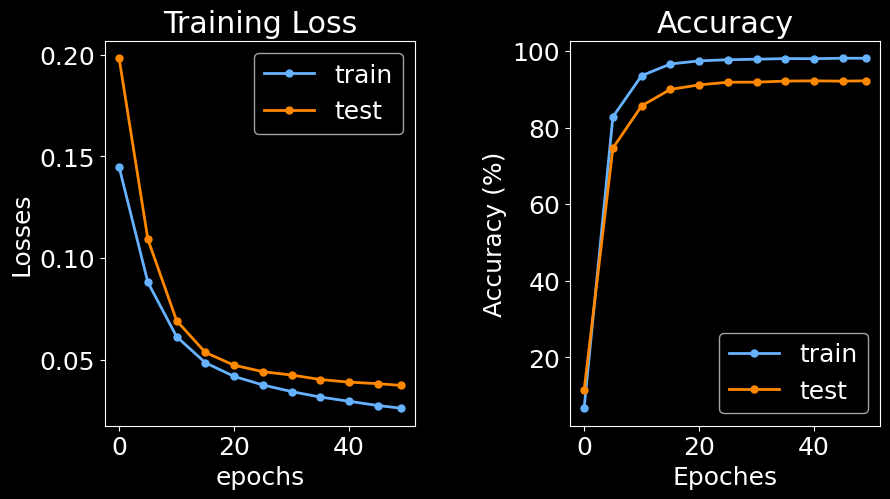

Training edge classifier:  98%|█████████▊| 49/50 [35:57<00:42, 42.12s/it]

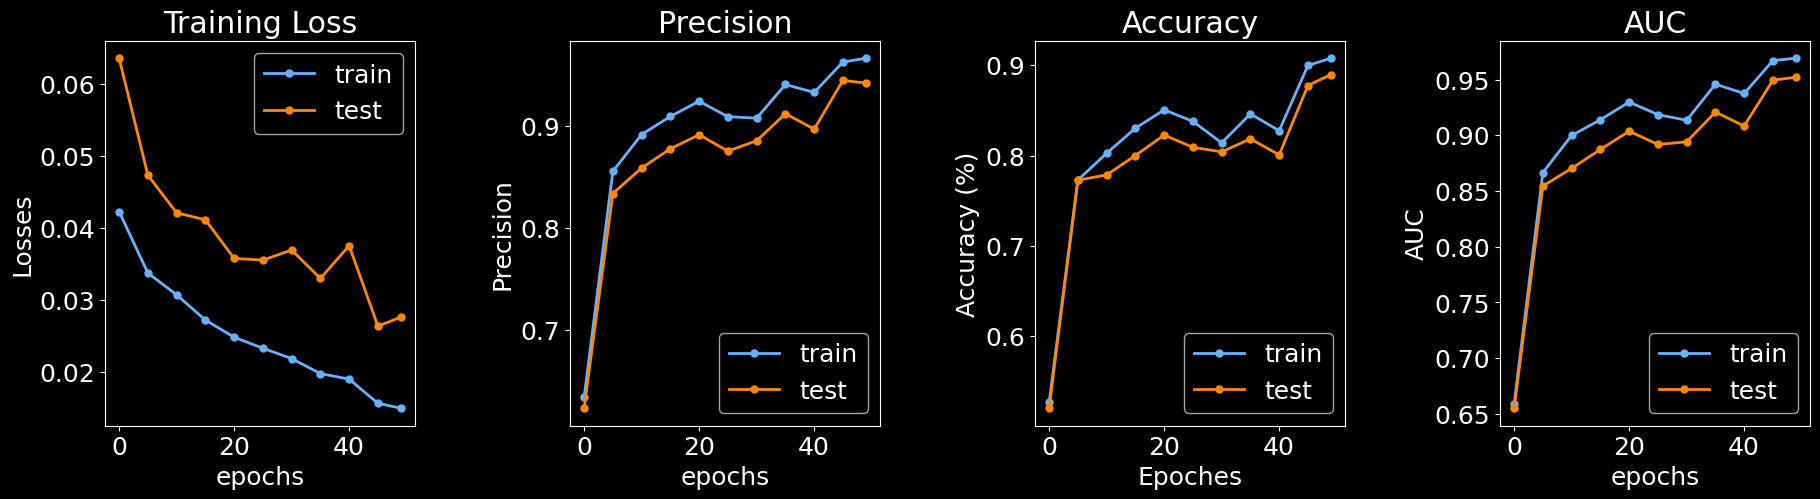

Training edge classifier: 100%|██████████| 50/50 [36:53<00:00, 44.28s/it]


In [6]:
br.train.Training(
    bg,
    edge_image_conv2d_hidden_dims = edge_image_conv2d_hidden_dims,
    edge_image_mlp_hidden_dims = edge_image_mlp_hidden_dims,
)

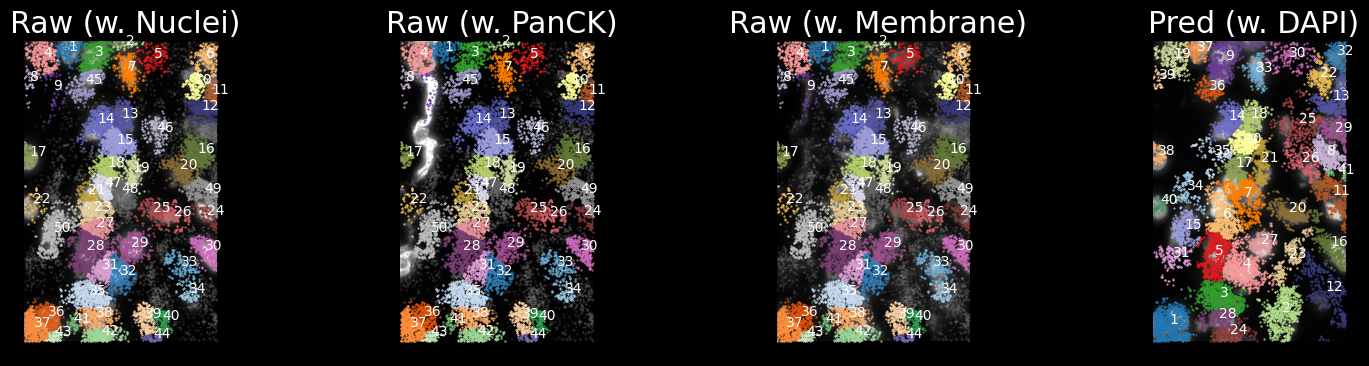

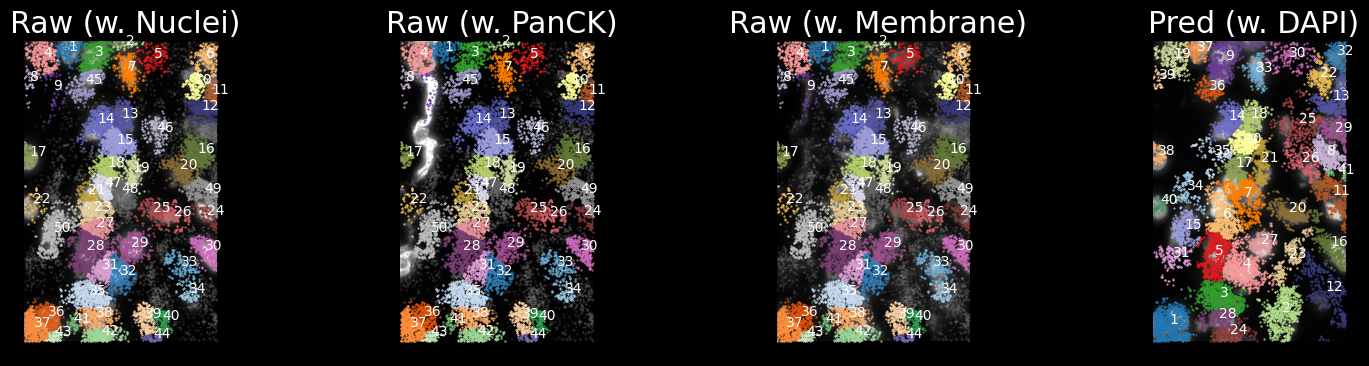

In [7]:
# plot cell segmentation
random_cell = cells = random.sample(bg.segmented.index.values.tolist(), 1)[0]
br.pl.Plot_Segmentation(
    bg, 
    cell_name = random_cell,
    n_neighbors = 10, 
    zoomout_scale = 4,
    use_image = True,
    pos_thresh = 0.6,
    resolution = 0.05,
    num_edges_perSpot = 100,
    min_prob_nodeclf = 0.3,
    n_iters = 20,
)

### deep image encoder

In [8]:
bg = br.BrGraph(df_spots_seg, df_spots_unseg, image = img, channels = channels)
br.graphs.BuildWindowGraphs(bg, n_cells_perClass = 4, window_width = 100.0, window_height = 100.0, n_neighbors = 10)
br.graphs.CreateData(bg, batch_size = 16, training_ratio = 0.8)

In [9]:
edge_image_conv2d_hidden_dims = [6, 32, 64, 128, 256]
edge_image_mlp_hidden_dims = [32, 64]

Training node classifier:  98%|█████████▊| 49/50 [00:20<00:00,  2.88it/s]

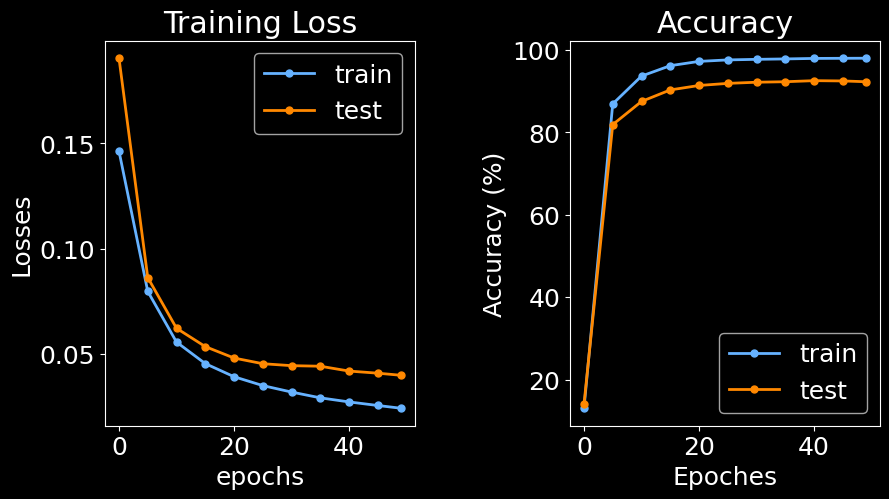

Training edge classifier:  98%|█████████▊| 49/50 [36:48<00:43, 43.92s/it]

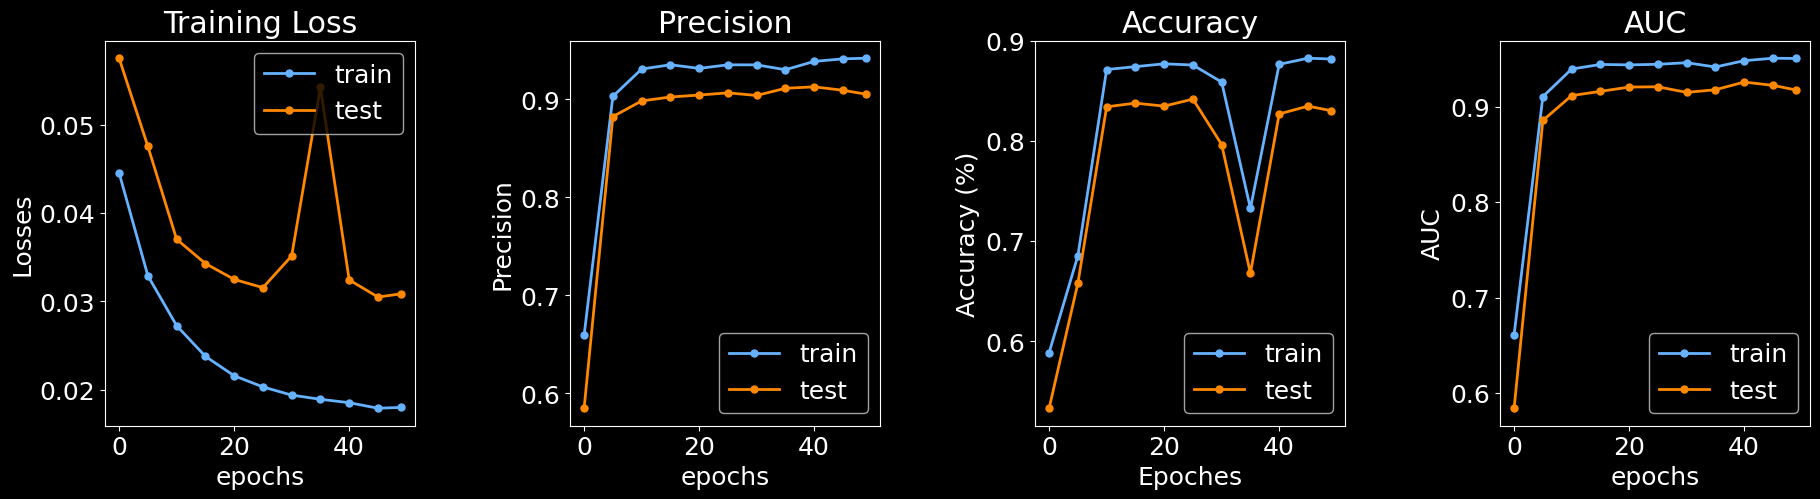

Training edge classifier: 100%|██████████| 50/50 [37:46<00:00, 45.33s/it]


In [10]:
br.train.Training(
    bg,
    edge_image_conv2d_hidden_dims = edge_image_conv2d_hidden_dims,
    edge_image_mlp_hidden_dims = edge_image_mlp_hidden_dims,
)

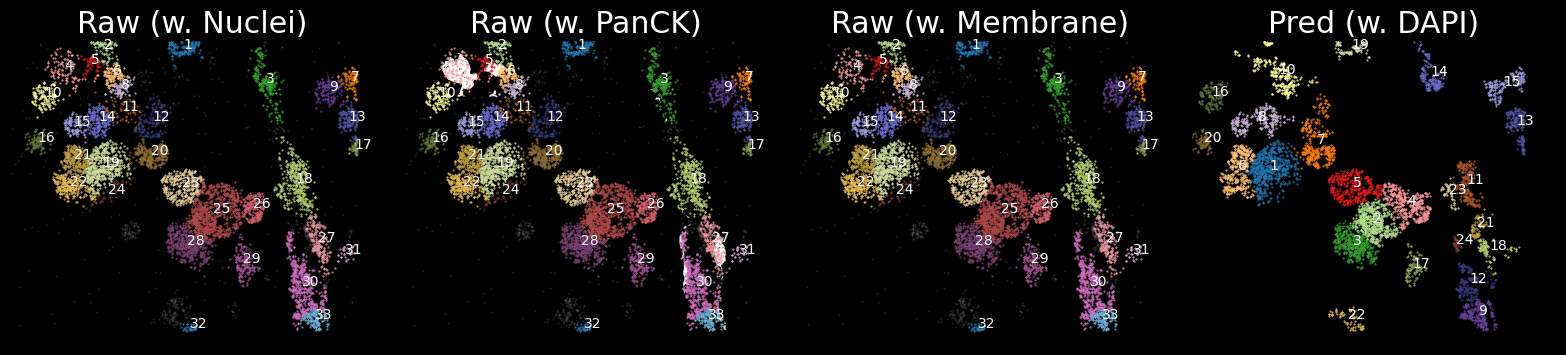

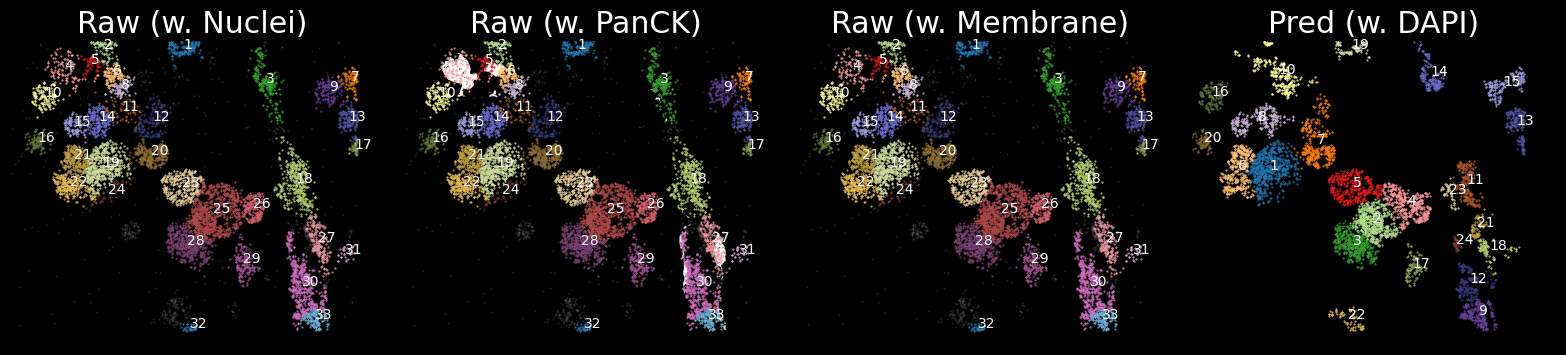

In [11]:
# plot cell segmentation
random_cell = cells = random.sample(bg.segmented.index.values.tolist(), 1)[0]
br.pl.Plot_Segmentation(
    bg, 
    cell_name = random_cell,
    n_neighbors = 10, 
    zoomout_scale = 4,
    use_image = True,
    pos_thresh = 0.6,
    resolution = 0.05,
    num_edges_perSpot = 100,
    min_prob_nodeclf = 0.3,
    n_iters = 20,
)